<h3> General Forecasting Methods </h3>

<b> Forecasting Procedure: </b> 

 - Choose Model (through statistical analysis)
 - Split data into train and test sets (for fairly evaluate our model)
 - Fit model on training set
 - Evaluate model on test set
 - Refit model on etire dataset
 - Forecast for future dataset

<b> Section Overview: </b> 

 - Forecasting
 - ACF and PACF plots
 - Autoregression - AR
 - Descriptive Statistics and Tests
 - Choosing ARIMA orders
 - ARIMA based models

### Introduction to Forecasting

#### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### Data read

In [2]:
df = pd.read_csv('airline_passengers.csv',index_col='Month',parse_dates=True)

In [3]:
df.index.freq = 'MS'
df.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [4]:
df.tail() #after we will forecast next three yers after 1960

,Thousands of Passengers
Month,
1960-08-01,606
1960-09-01,508
1960-10-01,461
1960-11-01,390
1960-12-01,432


#### Train/Test Split

The test size should ideally be at least as large as maximum forecast horizon required. It is generally around 20% of the total sample. However more is the test size (longer forecast horizon) prediction is less accurate (as more nosie is added)

In [5]:
train_data = df.iloc[:109] #first 109 entries or .loc[:'1940-01-01']
test_data = df.iloc[108:]

In [7]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

fitted_model = ExponentialSmoothing(train_data['Thousands of Passengers'],
                                    trend='mul',
                                    seasonal='mul',
                                    seasonal_periods=12).fit()

In [8]:
test_predictions = fitted_model.forecast(36); #12 periods for 1 year

In [9]:
test_predictions

1958-02-01    339.143032
1958-03-01    399.281896
1958-04-01    394.233997
1958-05-01    402.545543
1958-06-01    473.128522
1958-07-01    521.795005
1958-08-01    514.512937
1958-09-01    446.216497
1958-10-01    385.430919
1958-11-01    339.645080
1958-12-01    381.455910
1959-01-01    401.210107
1959-02-01    387.159306
1959-03-01    455.812702
1959-04-01    450.050116
1959-05-01    459.538420
1959-06-01    540.114621
1959-07-01    595.671363
1959-08-01    587.358291
1959-09-01    509.392359
1959-10-01    440.000688
1959-11-01    387.732435
1959-12-01    435.462892
1960-01-01    458.013911
1960-02-01    441.973782
1960-03-01    520.347207
1960-04-01    513.768747
1960-05-01    524.600416
1960-06-01    616.584692
1960-07-01    680.007224
1960-08-01    670.517177
1960-09-01    581.512736
1960-10-01    502.296509
1960-11-01    442.628055
1960-12-01    497.116246
1961-01-01    522.860066
Freq: MS, dtype: float64

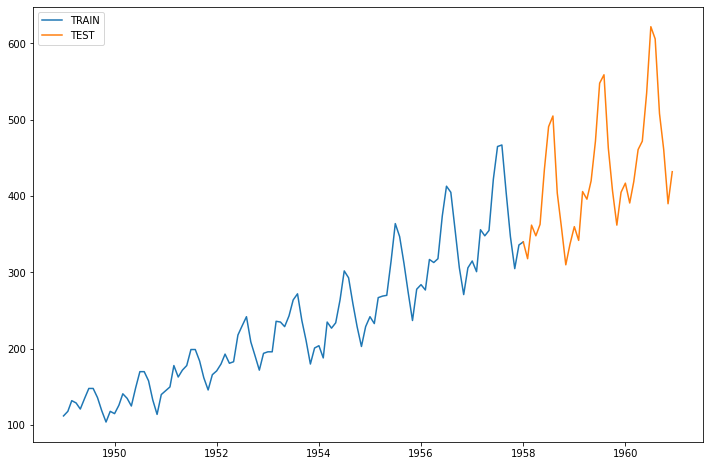

In [10]:
plt.figure(figsize=(12,8));
plt.plot(train_data['Thousands of Passengers'],label='TRAIN');
plt.plot(test_data['Thousands of Passengers'],label='TEST')
plt.legend();

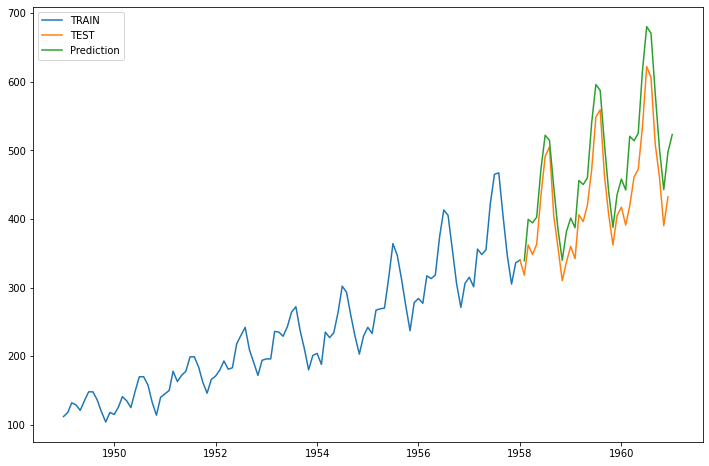

In [11]:
plt.figure(figsize=(12,8));
plt.plot(train_data['Thousands of Passengers'],label='TRAIN');
plt.plot(test_data['Thousands of Passengers'],label='TEST');
plt.plot(test_predictions,label='Prediction');
plt.legend();

In the prediction model, we observe sometimes it is under predicting and sometimes it is over predicting

### Evaluating Predictions

To quantify how off our predicted values are rather than seeing visually. Metrics like accuracy or recall are not good for times series model as we need metrics designed for continuous values. We will use:

 - MAE - Mean Absolute Error
 - MSE - Mean Squared Error
 - RMSE - Root Mean Square Error

\begin{align*}
\textrm{MAE:}~~~~ \dfrac{1}{n}\sum_{i=1}^n  |y_i-\hat{y}_i|\\
\textrm{MSE:}~~~~ \dfrac{1}{n}\sum_{i=1}^n  (y_i-\hat{y}_i)^2\\
\textrm{RMSE:}~~~~ \sqrt{\dfrac{1}{n}\sum_{i=1}^n  (y_i-\hat{y}_i)^2}
\end{align*}

###### MAE - averaging errors doesn't tell us really whether we are too much or less off from predicted values
###### MSE - Large errors are noted more than MAE (can tell few points that are bit off as well) but when we square the errors, units are also squared that is hard to unit
###### RMSE - function as MSE but units are as original value chosen


Acceptable value for RMSE - depends upon data source. Ex RMSE of 20$ is good for future price of house but very bad for future price of candy price

In [13]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

print('MAE is : {}'.format(mean_absolute_error(test_data,test_predictions)))
print('MSE is : {}'.format(mean_squared_error(test_data,test_predictions)))

MAE is : 63.031188493774
MSE is : 5614.265289857208


In [14]:
test_data.describe()

,Thousands of Passengers
count,36.000000
mean,428.500000
std,79.329152
min,310.000000
25%,362.000000
50%,412.000000
75%,472.000000
max,622.000000


In [15]:
print('RMSE is : {}'.format(np.sqrt(mean_squared_error(test_data,test_predictions))))

RMSE is : 74.92840108968834


In [17]:
final_model = ExponentialSmoothing(df['Thousands of Passengers'],
                                   trend='mul',
                                  seasonal='mul',
                                  seasonal_periods=12).fit()

In [18]:
forecast_prediction = final_model.forecast(36)

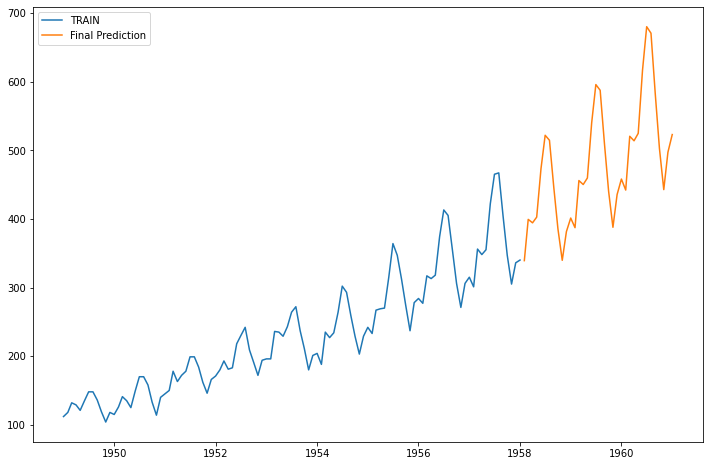

In [19]:
plt.figure(figsize=(12,8));
plt.plot(train_data['Thousands of Passengers'],label='TRAIN');
plt.plot(test_predictions,label='Final Prediction');
plt.legend();

###### Stationary

Time series dataset is said to be stationary if it doesn't exhibit trends or seasonality that is flucatuations in the data are entirely due to outside forces/noise

###### Non-Stationary

Time series dataset is said to be non-stationary if it exhibit trends or seasonality or both

In [20]:
df2 = pd.read_csv('samples.csv',index_col=0,parse_dates=True)
df2.head()

,a,b,c,d
1950-01-01,36,27,0,67
1950-02-01,58,22,3,31
1950-03-01,61,17,5,67
1950-04-01,37,15,8,47
1950-05-01,66,13,8,62


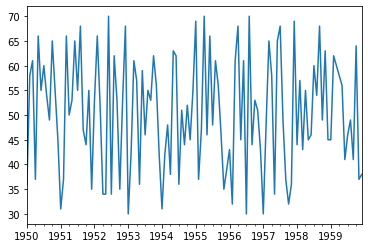

In [21]:
df2['a'].plot(); #no seasonality or trend component (growing or declining ?)

<AxesSubplot:>

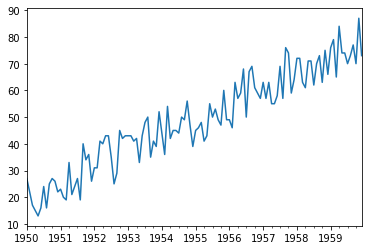

In [22]:
df2['b'].plot() #no seasnality but there is trend - non-stationary data

Non-stationary data can be made look stationary by differencing (between consecutive points)

In [24]:
from statsmodels.tsa.statespace.tools import diff

df2['b'] - df2['b'].shift(1)

1950-01-01     NaN
1950-02-01    -5.0
1950-03-01    -5.0
1950-04-01    -2.0
1950-05-01    -2.0
              ... 
1959-08-01     3.0
1959-09-01     4.0
1959-10-01    -7.0
1959-11-01    17.0
1959-12-01   -14.0
Name: b, Length: 120, dtype: float64

In [25]:
diff(df2['b'],k_diff=1)

1950-02-01    -5.0
1950-03-01    -5.0
1950-04-01    -2.0
1950-05-01    -2.0
1950-06-01     3.0
              ... 
1959-08-01     3.0
1959-09-01     4.0
1959-10-01    -7.0
1959-11-01    17.0
1959-12-01   -14.0
Name: b, Length: 119, dtype: float64

<AxesSubplot:>

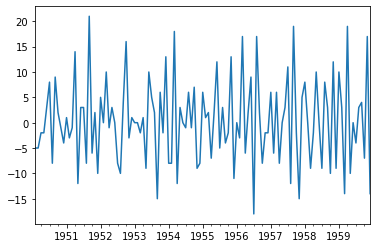

In [26]:
diff(df2['b'],k_diff=1).plot() #becomes stationary